In [1]:
using Plots; #gr() #pyplot()
using LaTeXStrings

In [2]:
using DifferentialEquations

In [4]:
function TwoVarFPEODE!(du, us, p, t)
    x, y = us


    # More nightmare syntax, making du elementwise equal to this bitch
    du[1] = (p.k₁ * p.n - p.k₋₁ * x) * x - p.k₃ * p.b * x  # dx
    du[2] = p.k₂ * p.n * x - (p.k₄ * p.b + p.k₅) * y      # dy
end;

In [5]:
function TwoVarFPEODE_Jac!(J, us, p, t)
    x, y = us

    J[1, 1] = p.k₁ * p.n - p.k₃ * p.b - 2 * p.k₋₁ * x
    J[1, 2] = p.k₂ * p.n
    J[2, 1] = 0
    J[2, 2] = -(p.k₄ * p.b + p.k₅)

end;

In [6]:
function ThreeVarFPEODE!(du, us, p, t)
    x, y, n = us


    # More nightmare syntax, making du elementwise equal to this bitch
    du[1] = (p.k₁ * n - p.k₋₁ * x) * x - p.k₃ * p.b * x  # dx
    du[2] = p.k₂ * n * x - (p.k₄ * p.b + p.k₅) * y      # dy
    du[3] = -(p.k₃ * p.b - p.k₋₁ * x) * x - p.k₂ * n * x + (p.k₄ * p.b + p.k₅) * y # dn
end;

In [7]:
function ThreeVarFPEODE_Jac!(J, us, p, t)
    x, y, n = us

    J[1, 1] = (p.k₁ * n - 2 * p.k₋₁ * x) - p.k₃ * p.b
    J[1, 2] = p.k₂ * n
    J[1, 3] = -(p.k₁ * n - 2 * p.k₋₁ * x) - p.k₂ * n
    J[2, 1] = 0
    J[2, 2] = -(p.k₄ * p.b + p.k₅)
    J[2, 3] = (p.k₄ * p.b + p.k₅)
    J[3, 1] = p.k₁ * x
    J[3, 2] = p.k₂ * x
    J[3, 3] = -(p.k₁ + p.k₂) * x

end;

In [8]:
k₁ = 1 ; k₋₁ = 1 ; k₂ = 1 ; k₃ = 1 ; k₄ = 1 ; k₅ = 1 ; 

In [9]:
b = 1;
n = 1;

In [10]:
t₀ = 0
#tₑ = 100_000
t₂ = 10.0
t₃ = .3
# t_span = (t₀, tₑ);

0.3

In [11]:
p = (; k₁, k₋₁, k₂, k₃, k₄, k₅, b, n);

In [12]:
u₀ = [1; 0; 99];

In [14]:
func₂ = ODEFunction(TwoVarFPEODE!; jac=TwoVarFPEODE_Jac!);
func₃ = ODEFunction(ThreeVarFPEODE!; jac=ThreeVarFPEODE_Jac!);

In [ ]:
# two_var_fixed = 

Base.Meta.ParseError: ParseError:
# Error @ /home/anakin/Dropbox/Uni/MastersThesis/Code/julia/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X20sZmlsZQ==.jl:1:17
two_var_fixed = 
#               └ ── premature end of input

In [16]:

gr()
alg = Rosenbrock23() # The recommended stiff solver


Rosenbrock23(; linsolve = nothing, precs = DEFAULT_PRECS, step_limiter! = trivial_limiter!, stage_limiter! = trivial_limiter!, autodiff = AutoForwardDiff(),)

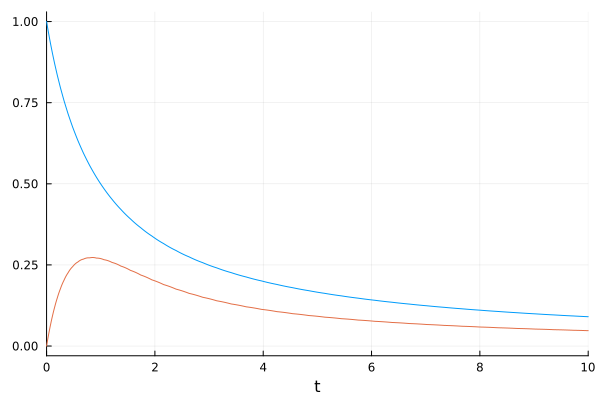

In [17]:
prob = ODEProblem(func₂, [1,0], (t₀, t₂), p);
# alg = Tsit5() # Non-stiff methods may not be ideal for this system
sol = solve(prob, alg);

ode_plot = plot(sol; 
    # idxs=[1, 2, 3], # Specifies which solutions I care to be plotted
    # idxs=(1, 2), # Sets up our phase space, comparing solution 1 to solution 2
    leg = false, # Legend
    plotdensity=10_000, # Ensures the right dpi for plot appearence
    # xscale=:log10
    )

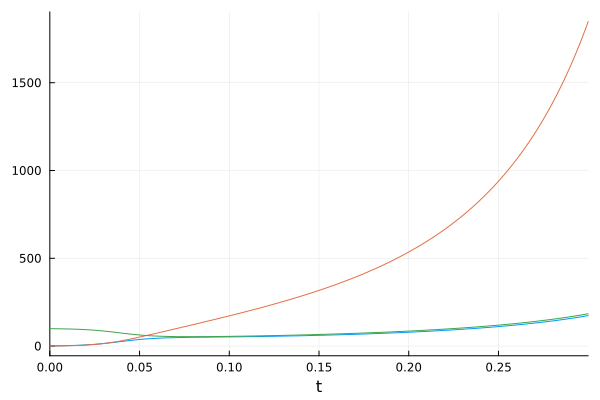

In [18]:
prob = ODEProblem(func₃, u₀, (t₀, t₃), p);
# alg = Tsit5() # Non-stiff methods may not be ideal for this system
sol = solve(prob, alg);

ode_plot = plot(sol; 
    # idxs=[1, 2, 3], # Specifies which solutions I care to be plotted
    # idxs=(1, 2), # Sets up our phase space, comparing solution 1 to solution 2
    leg = false, # Legend
    plotdensity=10_000, # Ensures the right dpi for plot appearence
    # xscale=:log10
    )